### Evaluating the Forecast

We have made use of Amazon Forecast to generate the forecasts on Walmart Sales Data for the next 10 days. The Walmart data-set has been extracted from the below mentioned link. All the configurations settings implemented to generate the forecast has been mentioned in the Project Report & Presentation. 

In this notebook, we shall be analyzing the forecast generated from Amazon Forecast. We have implemented three test cases to carry out a comparison, 

1. Initially we used the Auto-ML feature. In this, Amazon Forecast, automatically selects the best available algorithm to generate the forecast. 
2. ETS - Exponential Smoothing, commonly used local statistical algorithm for time-series forecasting.
3. CNN-QR - Convolutional Neural Network - Quantile Regression, is a propriety machine learing algorithm for forecasting scalar(one-dimensional) time-series using casual convolutional neural networks.It is a supervised learning algorithm making probabilistic predictions.

Kaggle: https://www.kaggle.com/c/walmart-recruiting-store-sales-forecasting/data

Amazon Forecast Tutorial: https://docs.aws.amazon.com/forecast/latest/dg/gs-console.html

In [112]:
# importing Libraries
import time
import pandas as pd
import numpy as np
import dateutil.parser

#### Overview of Actual Data-set
Here we shall look at the original data-set that is provided by Walmart on which forecasting is performed. We will be uploading the data and would select a given date and item from that dataframe and are going to plot the actual sales data.

In [156]:
actual_df = pd.read_csv('E:/FAST/Semester-IV/Cloud Computing/Project/walmart_forecast_dataset.csv', sep = ',', header='infer')

Now we shall view the initial few instances of the actual sales data from Walmart

In [157]:
actual_df.head(10)

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10
5,2013-01-06,1,1,12
6,2013-01-07,1,1,10
7,2013-01-08,1,1,9
8,2013-01-09,1,1,12
9,2013-01-10,1,1,9


Now we need to reduce the data to the time we wish to plot i.e.  1st December 2017

In [158]:
actual_df_date = actual_df[(actual_df['date'] >= '2017-11-31') & (actual_df['date'] <= '2017-12-01')]

In [159]:
actual_df_date

,date,store,item,sales
1795,2017-12-01,1,1,19
3621,2017-12-01,2,1,31
5447,2017-12-01,3,1,19
7273,2017-12-01,4,1,17
9099,2017-12-01,5,1,9
...,...,...,...,...
905665,2017-12-01,6,50,46
907491,2017-12-01,7,50,40
909317,2017-12-01,8,50,88
911143,2017-12-01,9,50,66


Now we shall look into a specific item on all the stores 1-50 i.e. 10

In [160]:
actual_df_date = actual_df_date[(actual_df_date['item'] == 10)]

In [161]:
actual_df_date.head()

,date,store,item,sales
166135,2017-12-01,1,10,71
167961,2017-12-01,2,10,91
169787,2017-12-01,3,10,81
171613,2017-12-01,4,10,55
173439,2017-12-01,5,10,61


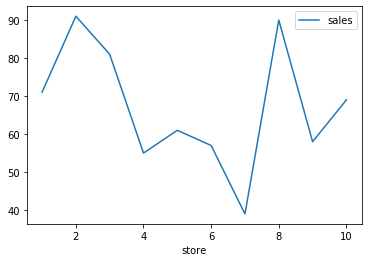

In [162]:
actual_df_date.plot(x = 'store', y = 'sales')

In [163]:
# Calculating the total sales for the item = 10
actual_df_date['sales'].sum()

672

#### Auto-ML Algorithm - Deep-AR Plus
This function selects the best fit model for the data-set to generate the results. The results are part of p10, p50, & p90 values as discussed in the project report. The algorithm utilised for the Auto-ML is Deep-AR Plus.

In [168]:
# Getting the dataframe
prediction_df_auto = pd.read_csv('E:/FAST/Semester-IV/Cloud Computing/Project/forcast_export/Auto_Select/data.csv', sep = ',', header='infer')

In [169]:
# Seeing the predictions overview
prediction_df_auto.head()

,item_id,date,p10,p50,p90
0,15,2018-01-01,514.917603,554.468689,585.740112
1,15,2018-01-02,628.341614,660.174500,689.619751
2,15,2018-01-03,623.277710,653.109375,683.619934
3,15,2018-01-04,669.308777,703.289062,737.141052
4,15,2018-01-05,706.147644,740.951050,770.478332


In [170]:
prediction_df_auto = prediction_df_auto.loc[prediction_df_auto['item_id'] == '10']
# Getting a 10-day forecast
prediction_dfauto_10= prediction_df_auto[(prediction_df_auto['date'] >= '2018-01-01') & (prediction_df_auto['date'] <= '2018-01-11')]

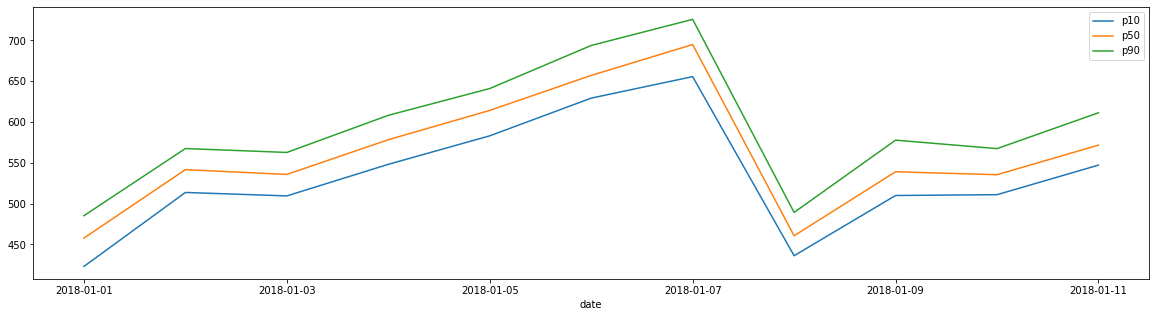

In [171]:
prediction_dfauto_10.plot(x = 'date', figsize=(20,5))

Now coming to the analysis, we can analyse that the p10 and p90 values provides a range of values known as an 80% confidence interval. The forecasted value at P10 is expected to be lower than the observed value 10% of the time, and the forecasted value at P90 is expected to be lower than the observed value 90% of the time. By generating forecasts at p10 and P90, you can expect the true value to fall between those bounds 80% of the time.

The total count of sales for item 10 on 2017-12-01 is 672 as displayed earlier. Using this implementation following are the forecasted values on 2018-01-01 (for example)

- p10: 423
- p50: 457
- p90: 485

Thus, the sale for the date 2018-01-01, would be between 423 - 485, 80% of the time.

RMSE: 26.9934 (AMAZON FORECAST)

### ETS Algorithm
This function selects the best fit model for the data-set to generate the results. The results are part of p10, p50, & p90 values as discussed in the project report. 

In [182]:
# Getting the dataframe
prediction_df_ets = pd.read_csv('E:/FAST/Semester-IV/Cloud Computing/Project/forcast_export/ETS/data.csv', sep = ',', header='infer')

In [183]:
# Seeing the predictions overview
prediction_df_ets.head()

,item_id,date,p10,p50,p90
0,15,2018-01-01,539.819758,574.219623,608.619487
1,15,2018-01-02,624.894427,670.245533,715.596638
2,15,2018-01-03,622.369759,672.557145,722.744531
3,15,2018-01-04,660.232522,718.415607,776.598693
4,15,2018-01-05,697.272443,763.625874,829.979304


In [184]:
prediction_df_ets = prediction_df_ets.loc[prediction_df_ets['item_id'] == '10']
# Getting a 10-day forecast
prediction_dfets_10= prediction_df_ets[(prediction_df_ets['date'] >= '2018-01-01') & (prediction_df_ets['date'] <= '2018-01-11')]

In [185]:
prediction_dfets_10.head()

,item_id,date,p10,p50,p90
1080,10,2018-01-01,451.752751,482.816600,513.880449
1081,10,2018-01-02,519.658005,559.595883,599.533761
1082,10,2018-01-03,520.613748,564.516192,608.418635
1083,10,2018-01-04,553.493334,604.043336,654.593338
1084,10,2018-01-05,584.169046,641.389809,698.610572


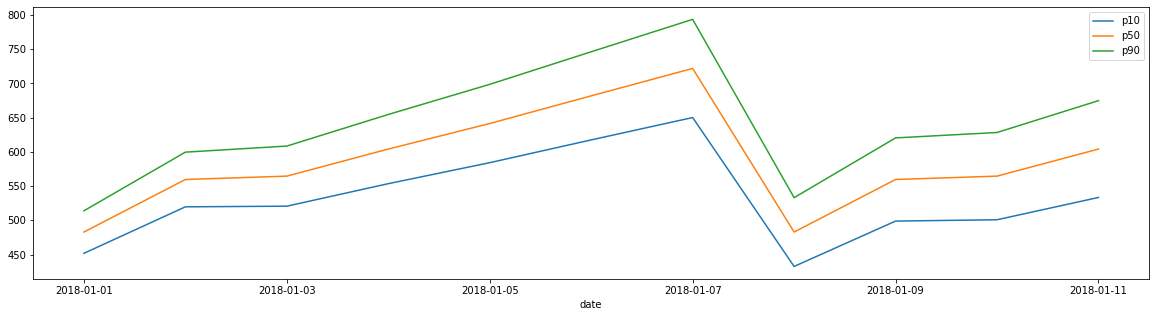

In [187]:
prediction_dfets_10.plot(x = 'date', figsize=(20,5))

Now coming to the analysis, we can analyse that the p10 and p90 values provides a range of values known as an 80% confidence interval. The forecasted value at P10 is expected to be lower than the observed value 10% of the time, and the forecasted value at P90 is expected to be lower than the observed value 90% of the time. By generating forecasts at p10 and P90, you can expect the true value to fall between those bounds 80% of the time.

The total count of sales for item 10 on 2017-12-01 is 672 as displayed earlier. Using this implementation following are the forecasted values on 2018-01-01 (for example)

- p10: 451
- p50: 482
- p90: 513

Thus, the sale for the date 2018-01-01, would be between 451 - 513, 80% of the time.

RMSE: 182.5875 (AMAZON FORECAST)

#### CNN-QR Algorithm
This function selects the best fit model for the data-set to generate the results. The results are part of p10, p50, & p90 values as discussed in the project report.

In [188]:
# Getting the dataframe
prediction_df_cnn = pd.read_csv('E:/FAST/Semester-IV/Cloud Computing/Project/forcast_export/QR_CNN/data.csv', sep = ',', header='infer')

In [189]:
# Seeing the predictions overview
prediction_df_cnn.head()

,item_id,date,p10,p50,p90
0,15,2018-01-01,537.115295,581.784058,692.729981
1,15,2018-01-02,616.168640,655.990234,698.724365
2,15,2018-01-03,619.892761,658.546448,703.936646
3,15,2018-01-04,661.951416,706.792847,753.914062
4,15,2018-01-05,681.551697,730.702759,790.750122


In [190]:
prediction_df_cnn = prediction_df_cnn.loc[prediction_df_cnn['item_id'] == '10']
# Getting a 10-day forecast
prediction_dfcnn_10= prediction_df_cnn[(prediction_df_cnn['date'] >= '2018-01-01') & (prediction_df_cnn['date'] <= '2018-01-11')]

In [191]:
prediction_dfcnn_10.head()

,item_id,date,p10,p50,p90
1080,10,2018-01-01,453.307434,495.643005,585.245666
1081,10,2018-01-02,515.691040,547.983704,587.910706
1082,10,2018-01-03,522.583008,562.342773,597.681580
1083,10,2018-01-04,562.059509,594.737061,636.558960
1084,10,2018-01-05,608.806335,651.583801,700.646790


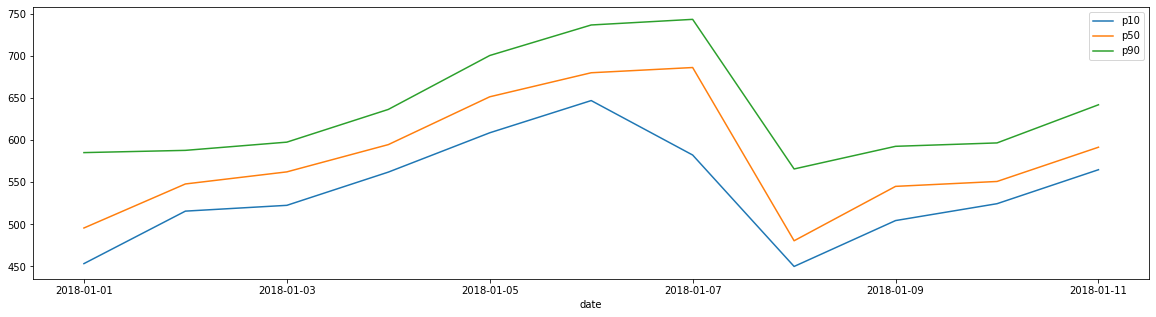

In [192]:
prediction_dfcnn_10.plot(x = 'date', figsize=(20,5))

Now coming to the analysis, we can analyse that the p10 and p90 values provides a range of values known as an 80% confidence interval. The forecasted value at P10 is expected to be lower than the observed value 10% of the time, and the forecasted value at P90 is expected to be lower than the observed value 90% of the time. By generating forecasts at p10 and P90, you can expect the true value to fall between those bounds 80% of the time.

The total count of sales for item 10 on 2017-12-01 is 672 as displayed earlier. Using this implementation following are the forecasted values on 2018-01-01 (for example)

- p10: 453
- p50: 495
- p90: 585

Thus, the sale for the date 2018-01-01, would be between 453 - 585, 80% of the time.

RMSE: 144.7491 (AMAZON FORECAST)

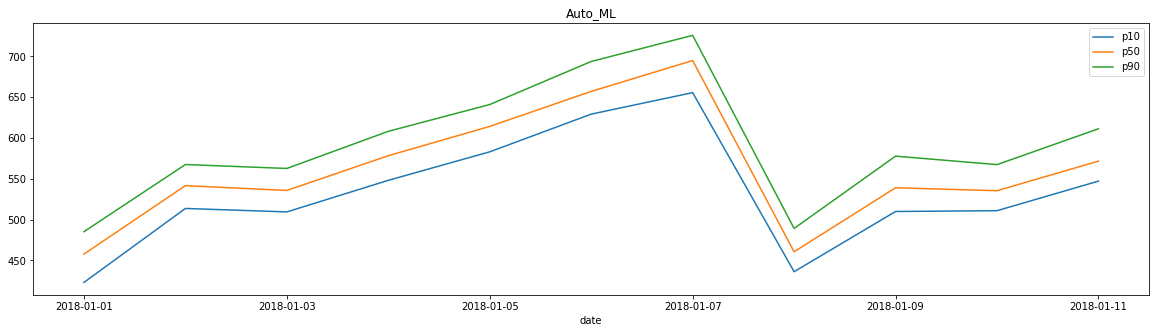

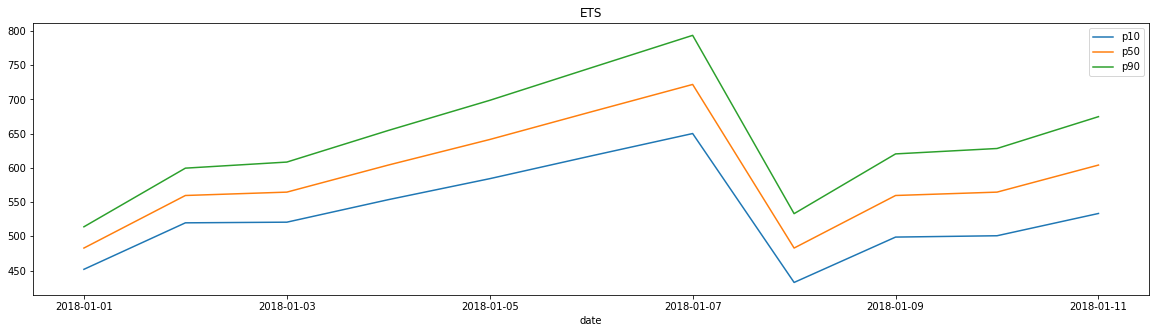

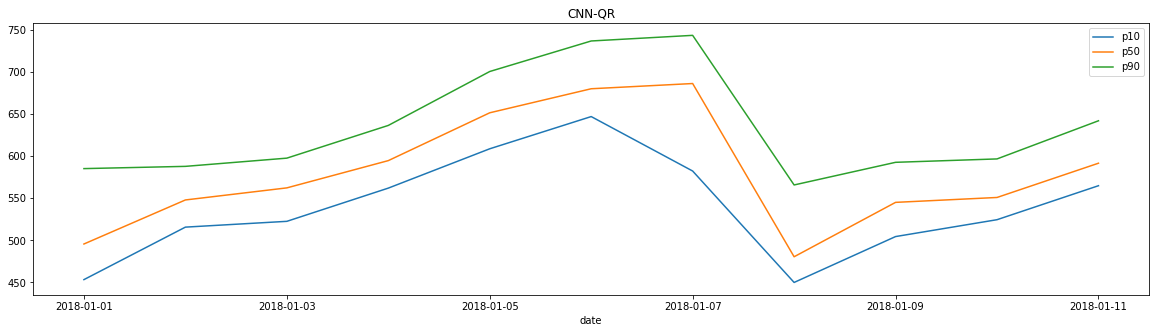

In [194]:
prediction_dfauto_10.plot(x = 'date', figsize=(20,5), title = 'Auto_ML')
prediction_dfets_10.plot(x = 'date', figsize=(20,5), title = 'ETS')
prediction_dfcnn_10.plot(x = 'date', figsize=(20,5), title = 'CNN-QR')

#### Conclusion

We can see that the 80% range is smallest for the Auto-ML. 

For every data-set, every algorithm generates results based on the data available and the industry it is suited to more. 

As per the RMSE values generated, we can see that rating of the algorithm is follow, 

- Deep-AR Plus
- CNN-QR
- ETS

Deep-AR Plus is best option with the lowest RMSE value for the generation of forecast.